# Simulace šíření infekce - SIR model

Notebook obsahuje implementaci a simulaci SIR modelu šíření infekční nemoci. Pomocí Eulerovy metody je řešena soustava diferenciálních rovnic popisující vývoj tří skupin populace: náchylných (S), nakažených (I) a uzdravených/mrtvých (R).

### Použité postupy:

- Eulerova metoda pro numerické řešení diferenciálních rovnic
- Simulace tří různých scénářů s různými parametry
- Vizualizace dynamiky šíření infekce v čase

### Použité knihovny:
NumPy, Matplotlib

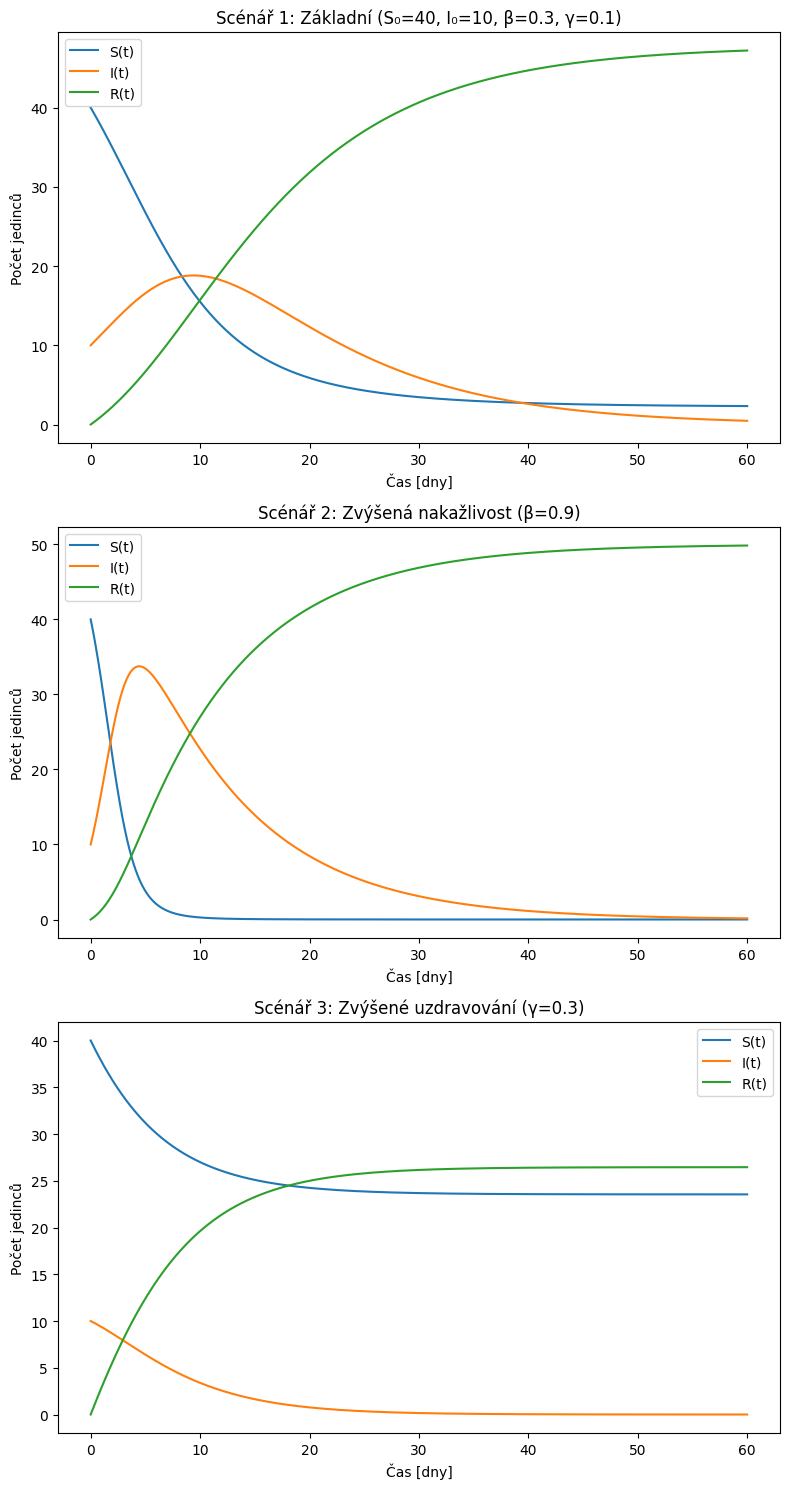

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Eulerova metoda pro SIR model
def euler_sir(S0, I0, R0, beta, gamma, N, dt, T):
    steps = int(T / dt)
    t = np.linspace(0, T, steps)
    S = np.zeros(steps)
    I = np.zeros(steps)
    R = np.zeros(steps)

    S[0], I[0], R[0] = S0, I0, R0

    for n in range(steps - 1):
        dS = -beta * S[n] * I[n] / N
        dI = beta * S[n] * I[n] / N - gamma * I[n]
        dR = gamma * I[n]

        S[n+1] = S[n] + dt * dS
        I[n+1] = I[n] + dt * dI
        R[n+1] = R[n] + dt * dR

    return t, S, I, R

# Základní parametry simulace
N = 50
dt = 0.1
T = 60
gamma = 0.1
beta = 0.3

# Scénář 1: Základní (S0 = 40, I0 = 10)
t1, S1, I1, R1 = euler_sir(S0=40, I0=10, R0=0, beta=beta, gamma=gamma, N=N, dt=dt, T=T)

# Scénář 2: Vyšší beta (větší nakažlivost)
t2, S2, I2, R2 = euler_sir(S0=40, I0=10, R0=0, beta=0.9, gamma=gamma, N=N, dt=dt, T=T)

# Scénář 3: Vyšší gamma (rychlejší uzdravování)
t3, S3, I3, R3 = euler_sir(S0=40, I0=10, R0=0, beta=beta, gamma=0.3, N=N, dt=dt, T=T)

# Grafy
plt.figure(figsize=(8, 15))

# Scénář 1
plt.subplot(3, 1, 1)
plt.plot(t1, S1, label='S(t)')
plt.plot(t1, I1, label='I(t)')
plt.plot(t1, R1, label='R(t)')
plt.title('Scénář 1: Základní (S₀=40, I₀=10, β=0.3, γ=0.1)')
plt.xlabel('Čas [dny]')
plt.ylabel('Počet jedinců')
plt.legend()

# Scénář 2
plt.subplot(3, 1, 2)
plt.plot(t2, S2, label='S(t)')
plt.plot(t2, I2, label='I(t)')
plt.plot(t2, R2, label='R(t)')
plt.title('Scénář 2: Zvýšená nakažlivost (β=0.9)')
plt.xlabel('Čas [dny]')
plt.ylabel('Počet jedinců')
plt.legend()

# Scénář 3
plt.subplot(3, 1, 3)
plt.plot(t3, S3, label='S(t)')
plt.plot(t3, I3, label='I(t)')
plt.plot(t3, R3, label='R(t)')
plt.title('Scénář 3: Zvýšené uzdravování (γ=0.3)')
plt.xlabel('Čas [dny]')
plt.ylabel('Počet jedinců')
plt.legend()

plt.tight_layout()
plt.show()
